In [38]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, callbacks
from keras.utils import load_img, img_to_array
from keras.optimizers import RMSprop
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
from PIL import Image

In [39]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [40]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [41]:
!ls "/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images"

test  train  validate


In [42]:
FAST_RUN = False
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
BATCH_SIZE = 32

In [43]:
# Set the directory for the training images
train_dir = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/train'
test_dir = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/test'
validation_dir = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate'

In [44]:
# Loop through all image files in the directory
def resize_images(path_to_directory, target_size):
  for filename in os.listdir(path_to_directory):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):  # Adjust for file extension
      # print(filename)
      # Open the image file
      image = Image.open(os.path.join(path_to_directory, filename))

      # Resize the image
      image = image.resize(target_size)

      # Save the resized image with the same filename
      image.save(os.path.join(path_to_directory, filename))

  print(f"All images resize to {target_size}")

In [45]:
resize_images(os.path.join(train_dir, 'partial_snow'), IMAGE_SIZE)
resize_images(os.path.join(train_dir, 'all_snow'), IMAGE_SIZE)
resize_images(os.path.join(train_dir, 'no_snow'), IMAGE_SIZE)

All images resize to (256, 256)
All images resize to (256, 256)
All images resize to (256, 256)


In [46]:
resize_images(os.path.join(validation_dir, 'partial_snow'), IMAGE_SIZE)
resize_images(os.path.join(validation_dir, 'all_snow'), IMAGE_SIZE)
resize_images(os.path.join(validation_dir, 'no_snow'), IMAGE_SIZE)

All images resize to (256, 256)
All images resize to (256, 256)
All images resize to (256, 256)


In [47]:

from keras.preprocessing.image import ImageDataGenerator

# # Create an instance of ImageDataGenerator for the test set
# test_datagen = ImageDataGenerator(
#     rescale=1./255   # Rescale the pixel values to the range [0, 1]
# )

# Create an instance of ImageDataGenerator for the validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,   # Rescale the pixel values to the range [0, 1]
)

# Create an instance of ImageDataGenerator for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Rescale the pixel values to the range [0, 1]
    rotation_range=20,   # Randomly rotate the images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift the images horizontally by up to 20% of the image width
    height_shift_range=0.2, # Randomly shift the images vertically by up to 20% of the image height
    shear_range=0.2,         # Randomly shear the images by up to 20%
    zoom_range=0.3,          # Randomly zoom the images by up to 20%
    horizontal_flip=True,    # Randomly flip the images horizontally
    vertical_flip=True,
    brightness_range = (0.8, 1.2), # brightness adjuster so that some partial images can detect when ground is dark
    fill_mode='nearest'      # Fill any empty pixels with the nearest available pixel value
)

# Use the flow_from_directory method to load the images from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,                 # Path to the training set directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),    # Resize the images to 256x256
    batch_size=BATCH_SIZE,             # Use batches of 32 images
    class_mode='categorical'   # Use categorical cross-entropy loss
)

# test_generator = test_datagen.flow_from_directory(
#     test_dir,                  # Path to the test set directory
#     target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),    # Resize the images to 256x256
#     batch_size=BATCH_SIZE//2,             # Use batches of 32 images
#     class_mode='categorical'   # Use categorical cross-entropy loss
# )

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,               # Path to the validation set directory
    target_size=IMAGE_SIZE,    # Resize the images to 256x256
    batch_size=BATCH_SIZE,             # Use batches of 32 images
    class_mode='categorical'   # Use categorical cross-entropy loss
)

# Load the training data into x_train and y_train
x_train, y_train = train_generator.next()


Found 1230 images belonging to 3 classes.
Found 283 images belonging to 3 classes.


In [48]:
for BATCH_SIZE, labels_batch in train_generator:
  print(BATCH_SIZE.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 3)


In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 3x3 configuration
nrows = 3
ncols = 3

# Index for iterating over images
pic_index = 0

In [50]:
# Directory with our training all_snow pictures
all_snow_dir = os.path.join(train_dir + '/all_snow')

# Directory with our training no_snow pictures
no_snow_dir = os.path.join(train_dir + '/no_snow')

# Directory with our training partial_snow pictures
partial_snow_dir = os.path.join(train_dir + '/partial_snow')


In [51]:
all_snow_names = random.sample(os.listdir(all_snow_dir), 10)
print(all_snow_names[:10])

no_snow_names = random.sample(os.listdir(no_snow_dir), 10)
print(no_snow_names[:10])

partial_snow_names = random.sample(os.listdir(partial_snow_dir), 10)
print(partial_snow_names[:10])


['IMG_0694.JPG', 'OIP (64).jpeg', '2019-01-28_09-50-20_469.jpg', 'download (20).jpeg', 'Copy of Copy of Copy of solar-panels-snow-production-hot-water-covered-68095603.jpg', 'OIP (91).jpeg', 'OIP (16).jpeg', 'download (31).jpeg', '2019-01-28_14-20-23_687.jpg', 'Copy of Copy of solar-panels-private-house-covered-snow-inactivity-winter-concept-completely-261797669.jpg']
['download (17).jpeg', 'download.jpeg', 'download (8).jpeg', 'images (52).jpeg', 'images - 2023-03-08T212623.813.jpeg', 'images - 2023-03-08T211847.343.jpeg', 'istockphoto-626360514-612x612.jpg', 'images - 2023-03-08T212103.596.jpeg', 'images (20).jpeg', 'GettyImages-104627690.webp']
['OIP (15).jpeg', 'R (3).jpeg', 'images (8).jpeg', 'clearing-snow-from-solar-panels.jpg', 'OIP (28).jpeg', '2019-02-28_11-35-47_703.jpg', 'istockphoto-929835548-612x612.jpg', 'istockphoto-1429575332-612x612.jpg', 'Copy of Copy of close-up-surface-house-roof-covered-solar-panels-winter-snow-top-energy-efficiency-maintenance-concept-181196684.j

In [52]:
all_snow_cnt = len(os.listdir(all_snow_dir))
no_snow_cnt = len(os.listdir(no_snow_dir))
partial_snow_cnt = len(os.listdir(partial_snow_dir))

print('total training all_snow images:', all_snow_cnt)
print('total training no_snow images:', no_snow_cnt)
print('total training partial_snow images', partial_snow_cnt)


total training all_snow images: 418
total training no_snow images: 422
total training partial_snow images 422


In [53]:
from keras.utils import img_to_array

# Load the first example of a image
sample_image  = load_img(f"{os.path.join(partial_snow_dir, os.listdir(partial_snow_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (256, 256, 3)
The maximum pixel value used is: 255.0


In [54]:
if (all_snow_cnt != no_snow_cnt or all_snow_cnt != partial_snow_cnt or no_snow_cnt != partial_snow_cnt):
  print('For better training needs same number of images for each category')

For better training needs same number of images for each category


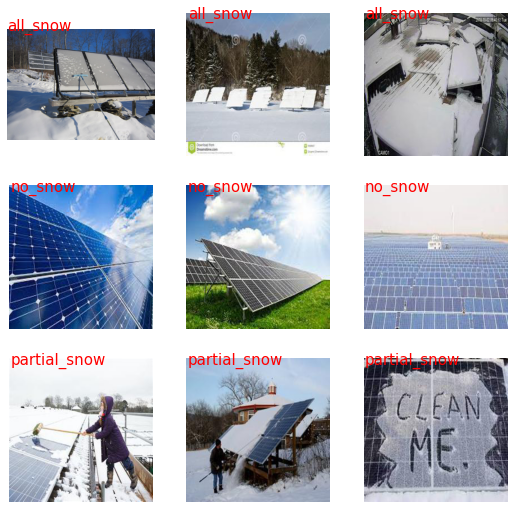

In [55]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 3
next_all_snow_pix = [os.path.join(all_snow_dir, fname) 
                for fname in all_snow_names[pic_index-3:pic_index]]
next_no_snow_pix = [os.path.join(no_snow_dir, fname) 
                for fname in no_snow_names[pic_index-3:pic_index]]
next_partial_snow_pix = [os.path.join(partial_snow_dir, fname) 
                for fname in partial_snow_names[pic_index-3:pic_index]]

for i, img_path in enumerate(next_all_snow_pix + next_no_snow_pix + next_partial_snow_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if i < 3:
    plt.text(2, 10, 'all_snow', fontsize=15, color='red')
  elif i >=3 and i < 6:
    plt.text(2, 10, 'no_snow', fontsize=15, color='red')
  else:
    plt.text(2, 10, 'partial_snow', fontsize=15, color='red')

plt.show()

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [56]:
#Build the model

model = models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 3 bytes color
    # This is the first convolution
    # add the convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    # The second convolution
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # The third convolution
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fourth convolution
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fourth convolution
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fifth convolution
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # layers.Dropout(0.2),

    # add the fully connected layers
    # Flatten the results to feed into a DNN
    layers.Flatten(),
    # 512 neuron hidden layer
    layers.Dense(512, activation='relu'),
    # 3 output neuron. It will contain a value from 0-2 where 0 for first class ('no_snow'), 
    # 1 for the second class ('all_snow'),and 2 for third class ('partial_snow')
    layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [57]:
#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [58]:
# callback class
class myCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 90 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy') > 0.90):

      # Stop if threshold is met
      print("\nAccuracy is higher than 0.90 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [59]:
#Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=150,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2,
      callbacks=[callbacks]
)

Epoch 1/150
39/39 - 31s - loss: 1.2899 - accuracy: 0.3699 - val_loss: 1.1559 - val_accuracy: 0.2604 - 31s/epoch - 789ms/step
Epoch 2/150
39/39 - 30s - loss: 1.1068 - accuracy: 0.4236 - val_loss: 1.0463 - val_accuracy: 0.4375 - 30s/epoch - 767ms/step
Epoch 3/150
39/39 - 30s - loss: 1.0805 - accuracy: 0.4837 - val_loss: 0.9379 - val_accuracy: 0.5521 - 30s/epoch - 761ms/step
Epoch 4/150
39/39 - 30s - loss: 1.0349 - accuracy: 0.5252 - val_loss: 0.8648 - val_accuracy: 0.5938 - 30s/epoch - 758ms/step
Epoch 5/150
39/39 - 29s - loss: 0.9846 - accuracy: 0.5366 - val_loss: 0.8679 - val_accuracy: 0.6146 - 29s/epoch - 751ms/step
Epoch 6/150
39/39 - 30s - loss: 0.9134 - accuracy: 0.5902 - val_loss: 0.7400 - val_accuracy: 0.6875 - 30s/epoch - 760ms/step
Epoch 7/150
39/39 - 30s - loss: 0.8430 - accuracy: 0.6276 - val_loss: 0.4854 - val_accuracy: 0.7917 - 30s/epoch - 768ms/step
Epoch 8/150
39/39 - 30s - loss: 0.8787 - accuracy: 0.6260 - val_loss: 0.7465 - val_accuracy: 0.6562 - 30s/epoch - 757ms/step


In [60]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))

print('Validation loss:', loss)
print('Validation accuracy:', accuracy)


9/9 [==============================] - 1s 149ms/step - loss: 0.2720 - accuracy: 0.9293
Validation loss: 0.2720112204551697
Validation accuracy: 0.9293286204338074


In [61]:
class_dict = {0: "all_snow", 1: "no_snow", 2: "partial_snow"}


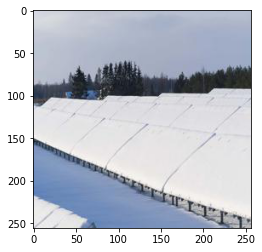

1/1 [==============================] - 0s 134ms/step

all_snow


In [62]:
# from keras.preprocessing.image import load_img, img_to_array

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/all_snow/snow_on_solar_14.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])



In [63]:
# Save the trained model
model.save('updated_snow_detection_on_solar_panel_model.h5')

In [64]:
import shutil
shutil.copy('updated_snow_detection_on_solar_panel_model.h5','gdrive/MyDrive/models/updated_snow_detection_on_solar_panel_model.h5')

'gdrive/MyDrive/models/updated_snow_detection_on_solar_panel_model.h5'

In [65]:
# Load the saved model
loaded_model = models.load_model('updated_snow_detection_on_solar_panel_model.h5')

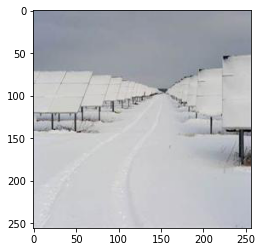

1/1 [==============================] - 0s 98ms/step

all_snow


In [66]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/all_snow/snow_on_solar_08.jpeg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

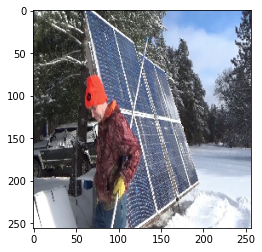

1/1 [==============================] - 0s 29ms/step

no_snow


In [67]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = "/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/test/ground_snow/Copy of maxresdefault (1).jpg"

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

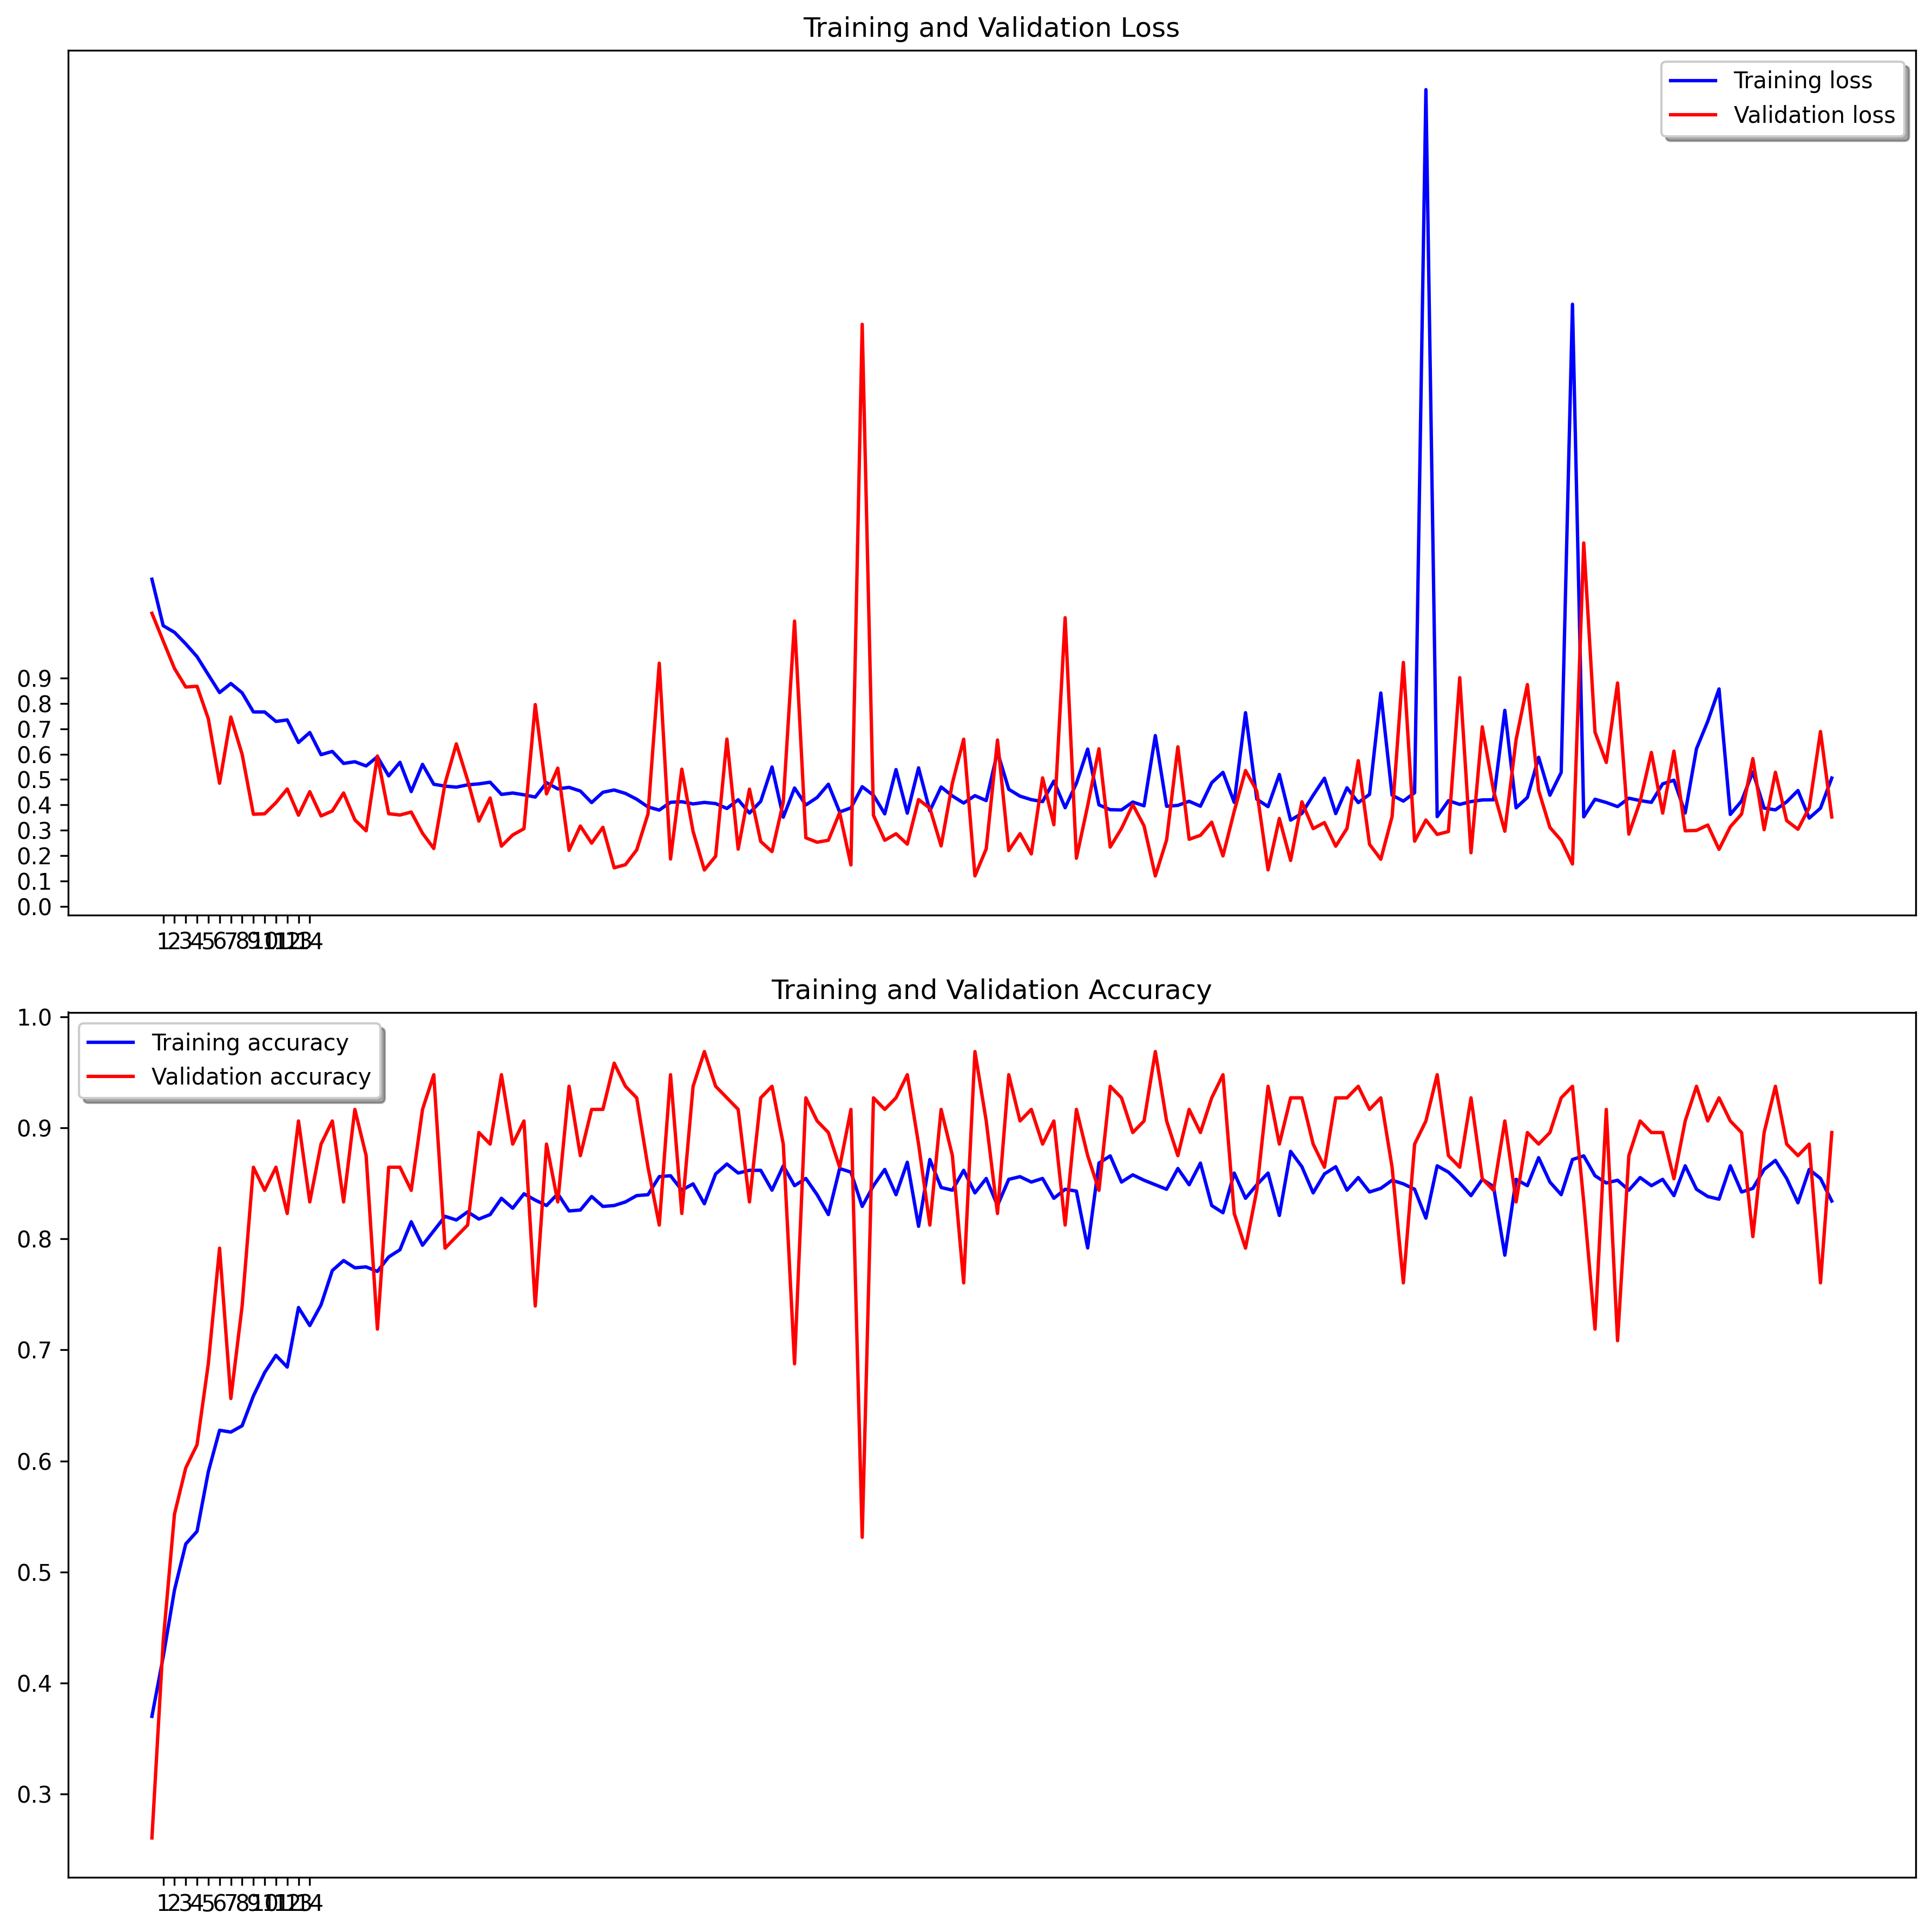

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), dpi=300)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, 15, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_title('Training and Validation Loss')
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 15, 1))
ax2.set_title('Training and Validation Accuracy')
ax2.legend(loc='best', shadow=True)

# legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

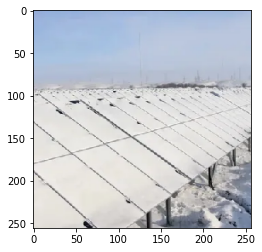

1/1 [==============================] - 0s 29ms/step

all_snow


In [69]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/all_snow/snow_on_solar_10.jpg.webp'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

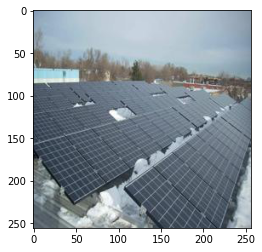

1/1 [==============================] - 0s 29ms/step

partial_snow


In [70]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/no_snow/snow_on_solar_15.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

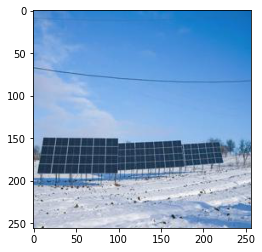

1/1 [==============================] - 0s 29ms/step

partial_snow


In [71]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/no_snow/snow_on_solar_12.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))

# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

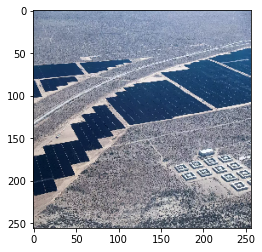

1/1 [==============================] - 0s 29ms/step

partial_snow


In [72]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/no_snow/snow_on_solar_05.webp'

# Load and preprocess your image
img = load_img(img_path, target_size=IMAGE_SIZE)
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

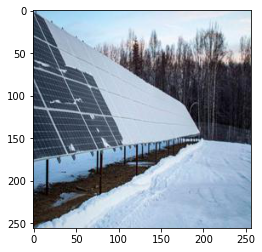

1/1 [==============================] - 0s 30ms/step

partial_snow


In [73]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/partial_snow/snow_on_solar_03.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

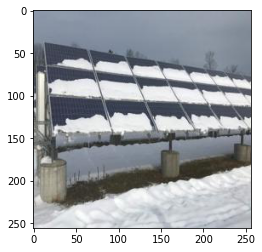

1/1 [==============================] - 0s 29ms/step

partial_snow


In [74]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/validate/partial_snow/snow_on_solar_17.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

In [75]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from keras.utils import img_to_array, load_img
from keras.models import Model

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
all_snow_img_files = [os.path.join(all_snow_dir, f) for f in all_snow_names]
no_snow_img_files = [os.path.join(no_snow_dir, f) for f in no_snow_names]
partial_snow_img_files = [os.path.join(partial_snow_dir, f) for f in partial_snow_names]
img_path = random.choice(all_snow_img_files + no_snow_img_files + partial_snow_img_files)
img = load_img(img_path, target_size=(256, 256))  
x = img_to_array(img)  # Numpy array with shape (256, 256, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 256, 256, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(len(feature_map.shape))
  if len(feature_map.shape) == 3:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

1/1 [==============================] - 0s 114ms/step
4
4
4
4
4
4
4
4
4
4
4
2
2
2


In [76]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


In [77]:
# Save the model.
with open('updated_snow_detection_on_solar_panel_model.tflite', 'wb') as f:
  f.write(tflite_model)

shutil.copy('updated_snow_detection_on_solar_panel_model.tflite','gdrive/MyDrive/models/updated_snow_detection_on_solar_panel_model.tflite')

'gdrive/MyDrive/models/updated_snow_detection_on_solar_panel_model.tflite'

### Run the TensorFlow Lite model

You can access the TensorFlow Lite saved model signatures in Python via the `tf.lite.Interpreter` class.

Load the model with the `Interpreter`:

In [78]:
TF_MODEL_FILE_PATH = 'gdrive/MyDrive/models/updated_snow_detection_on_solar_panel_model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [79]:
signature_list = interpreter.get_signature_list()
print(signature_list['serving_default']['inputs'][0])
print(signature_list['serving_default']['outputs'][0])
print(signature_list)

conv2d_6_input
dense_3
{'serving_default': {'inputs': ['conv2d_6_input'], 'outputs': ['dense_3']}}


In [80]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

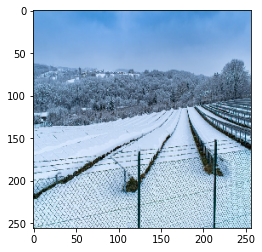

1/1 [==============================] - 0s 30ms/step

all_snow


In [88]:
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils import load_img, img_to_array
import numpy as np

# img_path = "/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/test/ground_snow/Copy of istockphoto-873278934-612x612.jpg"
# img_path = "/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/test/no_snow/R.jpeg"
img_path = "/content/gdrive/MyDrive/Snow_Covered_Solar_Panel_Detect/Images/test/all_snow/Copy of Solar-panels-cold-1024x683.jpg"

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# img = load_img(img_path, target_size=(128, 128))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

In [83]:
predictions_lite = classify_lite(conv2d_6_input=img)[signature_list['serving_default']['outputs'][0]]
score_lite = tf.nn.softmax(predictions_lite)

In [84]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_dict[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to no_snow with a 41.67 percent confidence.


In [85]:
print(np.max(np.abs(prediction - predictions_lite)))

1.7881393e-07
